In [1]:
import pycap
print(pycap.__git_commit_hash__)

b746ce7d9106afc051ba5eb6da16efccbd6af1eb


# Cyclic charge discharge

Cyclic Charge-Discharge is a common technique used to test the performance and cycle-life of energy storage devices. Most often, the charge and discharge are conducted at constant current until a set voltage is reached.

The following implements 4 cycles of a repetitive loop through several steps:

1. constant current charge at $0.5\ \mathrm{A}$ until voltage reaches a $2.1\ \mathrm{V}$ limit
2. potentiostatic hold until the current falls below $1\ \mathrm{mA}$ for a maximum duration time of $3\ \mathrm{min}$
3. rest at open circuit potential for $2\ \mathrm{s}$
4. constant load discharge at $3.33\ \mathrm{\Omega}$ to $0.7\ \mathrm{V}$
5. rest at open circuit potential for $5\ \mathrm{s}$

In [2]:
from pycap import PropertyTree,CyclicChargeDischarge,EnergyStorageDevice
from mpi4py import MPI

# setup the experiment
ptree=PropertyTree()
ptree.put_string('start_with','charge')
ptree.put_int   ('cycles',4)
ptree.put_double('time_step',0.01)

ptree.put_string('charge_mode','constant_current')
ptree.put_double('charge_current',0.5)
ptree.put_string('charge_stop_at_1','voltage_greater_than')
ptree.put_double('charge_voltage_limit',2.1)
ptree.put_bool  ('charge_voltage_finish',True)
ptree.put_double('charge_voltage_finish_max_time',180)
ptree.put_double('charge_voltage_finish_current_limit',1e-3)
ptree.put_double('charge_rest_time',2)

ptree.put_string('discharge_mode','constant_load')
ptree.put_double('discharge_load',3.33)
ptree.put_string('discharge_stop_at_1','voltage_less_than')
ptree.put_double('discharge_voltage_limit',0.7)
ptree.put_double('discharge_rest_time',5)

ccd=CyclicChargeDischarge(ptree)

The property tree is populated interactively here but it can parse directly an input file. Please refer to other examples.

The CCD experiment can be started with a `charge` or a `discharge step`. The length of the test is defined by the cycle number and the loop end criteria.

The charge mode can be `constant_current`, `constant_voltage`, or `constant_power`.
Two end criteria can be selected although only one is required.
**Note that they are no safeguards and poor end criteria will produce infinite loops!**
If `voltage_finish` is enabled (default value is `False`), the charge step proceeds to a potentiostatic step that ends after reaching the specified time `voltage_finish_max_time` or when the current falls between the limiting value `voltage_finish_current_limit` (absolute value).
The voltage finish step makes little sense in case of a constant voltage charge and therefore is not allowed.
The charge ends with an optional rest time period before proceeding with the next step.

The discharge process can be perfomed in four different modes: `contant_current`, `contant_voltage`, `constant_power`, or `constant_load`. End criteria must be chosen carfully here as well.

Let’s build an energy storage device, here a simple series RC circuit, with a $40\ \mathrm{m\Omega}$ resistor and a $3\ \mathrm{F}$ capacitor, and run the experiment.

11213 steps


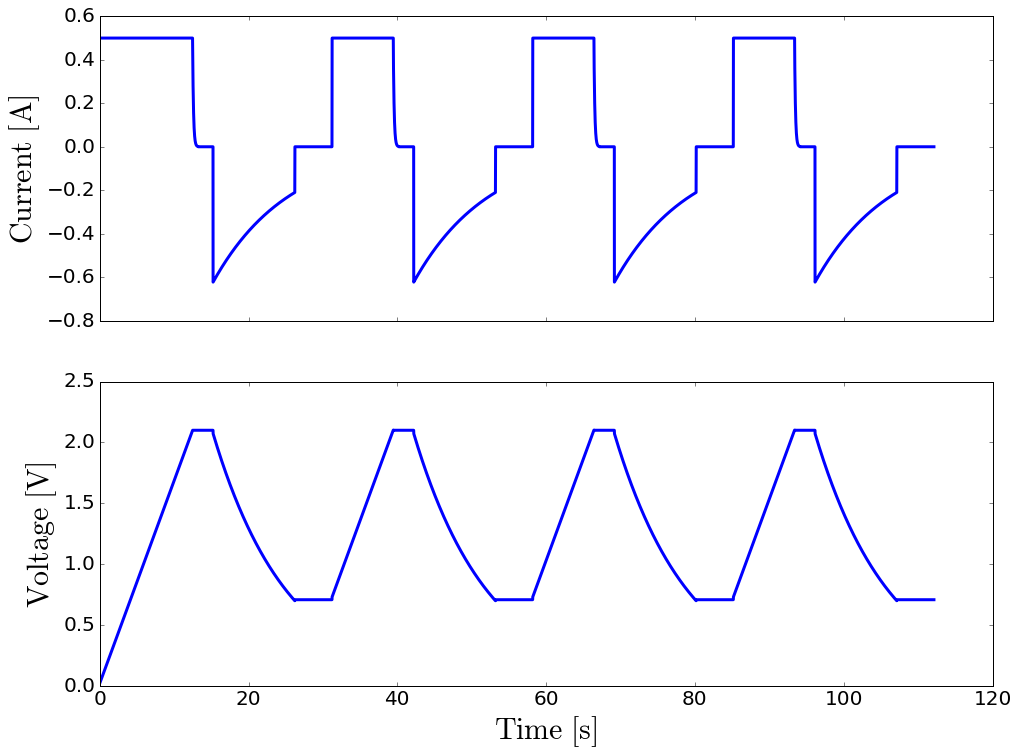

In [3]:
# build an energy storage device
ptree=PropertyTree()
ptree.put_string('type','SeriesRC')
ptree.put_double('series_resistance',40e-3)
ptree.put_double('capacitance',3)
device=EnergyStorageDevice(ptree, comm=MPI.COMM_WORLD)

from pycap import initialize_data,plot_data

# run the experiment and visualize the measured data
data=initialize_data()
steps=ccd.run(device,data)

print "%d steps"%steps

%matplotlib inline
plot_data(data)

11213 time steps ($\Delta t = 0.01\ \mathrm{s}$) are required to complete the CCD experiment. Above are plotted the measured current and voltage data versus time.